# <center> <strong> Graph-tool package </strong> </center>
<br />
<br />
<center><span style="white-space:nowrap;"><img src="https://graph-tool.skewed.de/static/img/graph-tool-logo.svg" alt="logo" style="width:200px"><strong>graph-tool</strong></span></center>
<br />
<br />

<h4> <center> Kristóf Furuglyás  </center> </h4>

<h4> <center> Clustering with networks, 2020 </center> </h4>

# <center> Table of contents </center>

- Graph-tool details
- Basic usage
- Non-parametric statistical inference
- Stochastic block model (nested)
- Inferring best partition
- Sampling from posterior distribution
- Network reconstruction

# <center> Details </center>


- Created by Tiago P. Peixoto 
- Python-wrapped C++ core
- Boost Graph Library, Open MP
- Inferring internal structure
- Web of trust (N=39,796 vertices and E=301,498 edges)

<div class="box">
<table class="ink-table alternating hover">
  <thead></thead><tbody><tr><th style="text-align: left">Algorithm</th><th style="text-align: left">graph-tool (16 threads)</th><th style="text-align: left">graph-tool (1 thread)</th><th style="text-align: left">igraph</th><th style="text-align: left">NetworkX</th></tr>
  <tr><td>Single-source shortest path  </td><td> 0.0023 s           </td><td> 0.0022 s          </td><td> 0.0092 s     </td><td>   0.25 s  </td></tr>
  <tr><td>Global clustering            </td><td> 0.011 s            </td><td> 0.025  s          </td><td> 0.027 s      </td><td>   7.94 s  </td></tr>
  <tr><td>PageRank                     </td><td> 0.0052 s           </td><td> 0.022  s          </td><td> 0.072 s      </td><td>   1.54 s  </td></tr>
  <tr><td>K-core                       </td><td> 0.0033 s           </td><td> 0.0036 s          </td><td> 0.0098 s     </td><td>   0.72 s  </td></tr>
  <tr><td>Minimum spanning tree        </td><td> 0.0073 s           </td><td> 0.0072 s          </td><td> 0.026 s      </td><td>   0.64 s  </td></tr>
  <tr><td>Betweenness                  </td><td> 102 s (~1.7 mins)  </td><td> 331 s (~5.5 mins) </td><td> 198 s (vertex) <br>+ 439 s (edge) <br>(~ 10.6 mins) </td><td>   10297 s (vertex) <br> 13913 s (edge) <br>(~6.7 hours) 
</td></tr></tbody></table>
</div>


# <center> Drawbacks </center>

- Increased time and memory required during compilation
- More resources needed
- igraph has bindings to R and C 
- Non-trivial installation

~~~
pip install networkx
jupyter notebook
~~~

Compared to

~~~shell
docker pull tiagopeixoto/graph-tool
~~~

~~~shell
docker run -p 8888:8888 -p 6006:6006 -it -u user -w /home/user -v /home/kfuruglyas:/home/user tiagopeixoto/graph-tool bash
~~~

~~~
[user@c20b92b8c4bf ~]$ jupyter notebook --ip 0.0.0.0
~~~

# <center> Other features </center>

- Vertex, edge and graph properties
- Efficient "on the fly" filtering
- Powerful graph I/O 
- Cairo and GTK+ based visualization

<center><img alt="_images/min_tree.svg" width="500" src="https://graph-tool.skewed.de/static/doc/_images/min_tree_filtered.svg"  style="float: center; vertical-align:middle;margin:50px 0px" ></center>


Created by Tiago de Paula Peixoto (brazilian network scientist at CEU). 

Python module for manipulation and statistical analysis of graphs. Algorithms are implemented in C++, hence the better performance. Core functions are in Cpp, the users interface is python. 

Boost is aset of libraries for C++ for basic linear algebra, pseudorandom number generations, mitluthreading and so on.  Many algorithms are implemented in parallel using OpenMP, which provides increased performance on multi-core architectures. 

NetworkX is a pure-python implementation, whereas igraph is implemented in C. Here we select a few representative algorithms which are implemented in all three libraries, and test them on the same graph. The graph used here is the strongly connected component of the PGP web of trust network circa November 2009. It is a directed graph, with N=39,796 vertices and E=301,498 edges. The network and test scripts can be downloaded at the bottom of the page. The functions were called several times, and the average time taken per function call was computed and shown below. 

As expected, graph-tool becomes even faster when OpenMP is enabled on algorithms which run in parallel (PageRank, global clustering and betweenness), and thus beats igraph in these cases by a significant margin, which would increase even further for larger networks and machines with more cores. 

One must remember that performance alone is not the only issue which should be considered. All these libraries have their own advantages and disadvantages, which need to be considered in detail when deciding what is the best library to use. Here are a couple of important facts: 

- Graph-tool's performance comes at the cost of increased time and memory required during compilation. This is mostly due to the in-place graph filtering functionality that the library provides, which none of the others do. Nevertheless, if one is using an operating system for which no pre-compiled binaries are available, this is an extra burden which the user should consider. 
- The igraph library requires less resources for compilation, and comes with additional bindings for the R and C languages which the other two lack.
- NetworkX is comparatively very inefficient, but it is trivial to install --- requiring no compilation at all, since it is pure python. Thus one can get started with very little to no effort. The speed may not be a problem if one is dealing with very small graphs, and does not care if an algorithm runs in, say, 1 or 30 seconds. However, if the graph size increases to hundreds of thousands, or millions of vertices/edges, this difference can scale up quickly.

Other important features include the different types properties that can be given to objects effective filtering algorithms 

# <center> Basic usage  </center>

In [1]:
from graph_tool.all import * 

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
num_of_nodes, num_of_edges = 9, 18

def create_edges(num_of_nodes, num_of_edges, self_loops = False, multiedges = True, weighted = True):
    edges_labels = {}
    while len(edges_labels.keys()) < num_of_edges:
        e_pair = tuple(np.random.choice(num_of_nodes, 2,self_loops))
        if multiedges or (e_pair not in list(edges_labels.keys()) and e_pair[::-1] not in list(edges_labels.keys())):
            e_weight = np.random.rand() if weighted else 1
            edges_labels[e_pair] = e_weight 
    return edges_labels

In [4]:
np.random.seed(0)
edges_labels = create_edges(num_of_nodes, num_of_edges)

In [5]:
g = Graph()

g.add_vertex(num_of_nodes);

for i,j in edges_labels.keys():
    g.add_edge(i,j)

# <center> Vertex, edge and graph properties </center>

In [6]:
eprop_wei = g.new_edge_property("double") 
eprop_str = g.new_edge_property("string")         

for c,key in enumerate(edges_labels.keys()):
    e = list(g.edges())[c]
    eprop_wei[e] = edges_labels[key]*10
    eprop_str[e] = f"{edges_labels[key]:.2f}"

In [7]:
vprop_id = g.new_vertex_property("string")         
for i in g.vertices():
    vprop_id[i] = str(i)

In [8]:
for v in g.vertices():
    print(v, end = ', ')
print()
for e in g.edges():
    print(e, end = ', ')

0, 1, 2, 3, 4, 5, 6, 7, 8, 
(0, 4), (0, 5), (1, 8), (1, 2), (1, 4), (1, 5), (2, 3), (3, 1), (4, 1), (4, 7), (4, 0), (5, 2), (5, 6), (7, 2), (7, 0), (7, 1), (8, 6), (8, 3), 

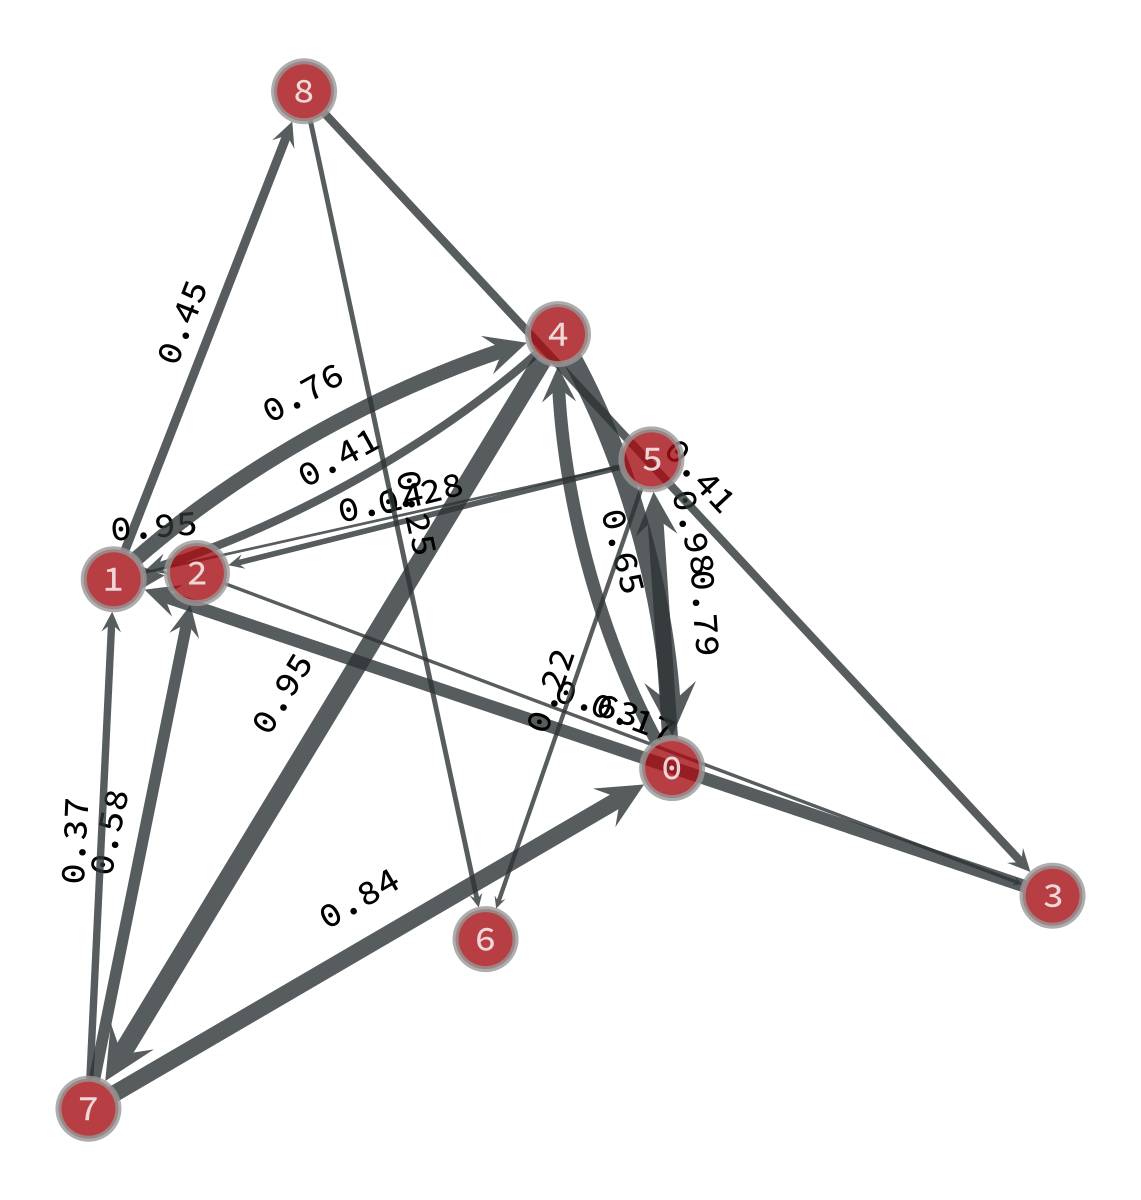

In [9]:
pos = random_layout(g)

graph_draw(g, pos,  vertex_text = vprop_id,
           vertex_size=30, edge_pen_width=eprop_wei,
           edge_text = eprop_str);

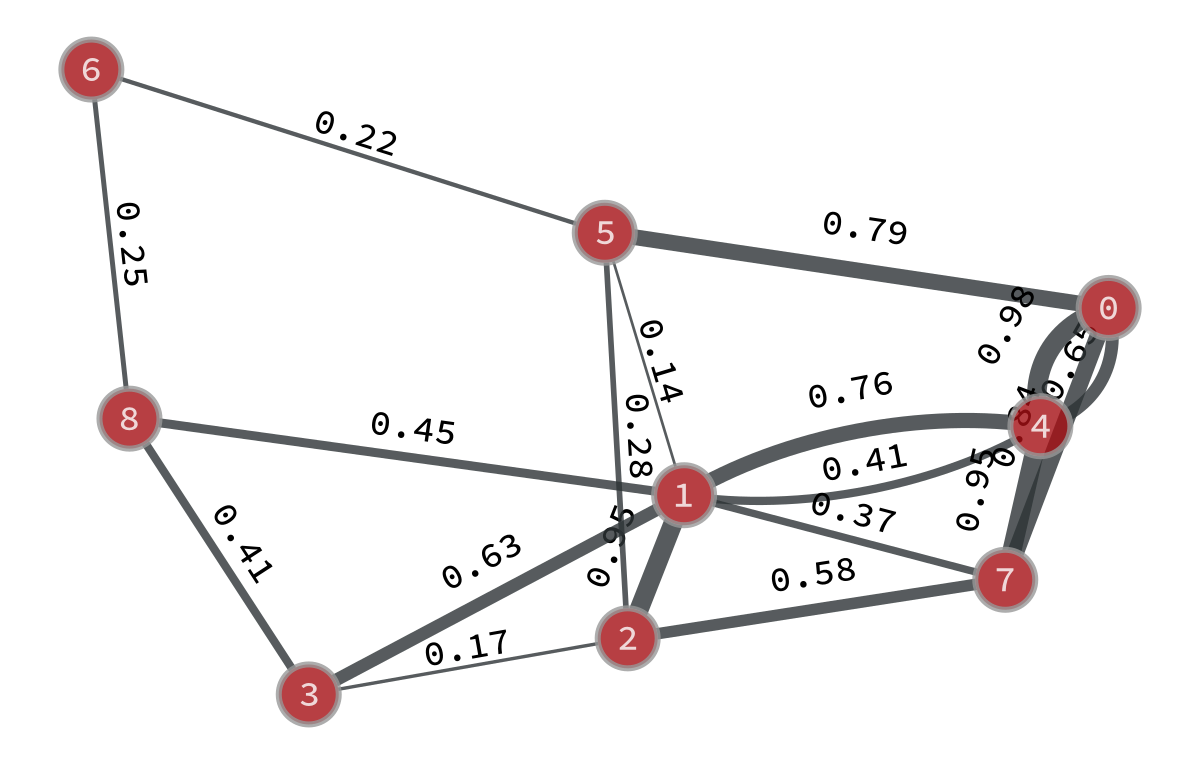

In [10]:
g.set_directed(False)
pos = arf_layout(g)
graph_draw(g, pos,  vertex_text = vprop_id,
                   vertex_size=30, edge_pen_width=eprop_wei, edge_text = eprop_str, );

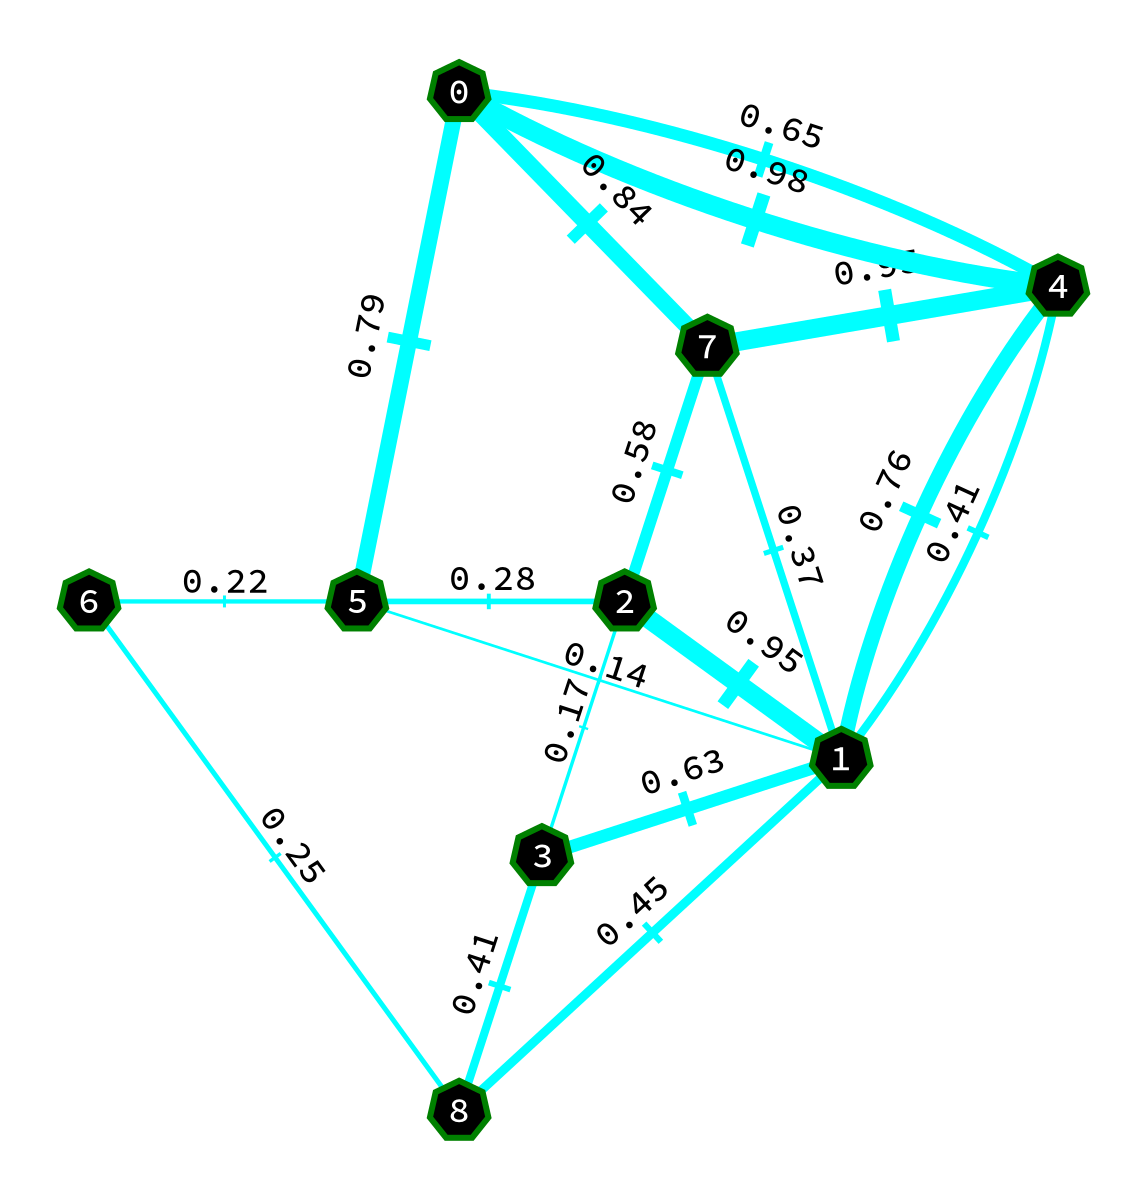

In [11]:
pos = radial_tree_layout(g, 2)

graph_draw(g, pos,  vertex_text = vprop_id,
                   vertex_size=30, edge_pen_width=eprop_wei, edge_text = eprop_str,
            vertex_color = 'green', vertex_shape = "heptagon",vertex_fill_color = 'k',
          edge_color = "cyan", edge_font_family= "cursive", edge_mid_marker = "bar");

# <center> Nonparametric statistical inference [1] </center>

- Goal: divide nodes into $B$ communities
- Partition $\mathbf{b} = \{b_i\} $ where $b_i \in \left[ 0, B-1\right]$ 
- Define probability that network $\mathbf{A}$ generated with $\mathbf{\theta}$ parameters:

$$
P\left( \mathbf{A}\left| \right.\mathbf{\theta}, \mathbf{b} \right)
$$

- Bayesian posterior probability

$$
P\left( \mathbf{b}\left| \right. \mathbf{A} \right) = 
\frac{\sum_{\mathbf{\theta}} P\left( \mathbf{A}\left| \right.\mathbf{\theta}, \mathbf{b} \right) P\left( \mathbf{\theta}, \mathbf{b} \right)}{P\left( \mathbf{A} \right)}
$$

- Evidence

$$
P \left(\mathbf{A} \right) = \sum_{\mathbf{\theta}, \mathbf{b}} P\left( \mathbf{A}\left| \right.\mathbf{\theta}, \mathbf{b} \right) P\left( \mathbf{\theta}, \mathbf{b} \right)
$$

# <center> Nonparametric statistical inference </center>

- "Hard constraints" = 1 possible set of parameters

$$
P\left( \mathbf{b}\left| \right. \mathbf{A} \right) = 
\frac{ P\left( \mathbf{A}\left| \right.\mathbf{\theta}, \mathbf{b} \right) P\left( \mathbf{\theta}, \mathbf{b} \right)}{P\left( \mathbf{A} \right)}
$$

- Either maximize posterior probability or
- Sampling different partitions acc. to post. probability


## <center> Minimum description length (MDL) </center>

$$
P\left( \mathbf{b}\left| \right. \mathbf{A} \right) = 
\frac{ \exp\left({-\Sigma}\right)}{P\left( \mathbf{A} \right)},
$$
where <strong> description length (entropy) </strong> is

$$
\Sigma = -\ln P\left( \mathbf{A}\left| \right.\mathbf{\theta}, \mathbf{b} \right) - \ln P\left( \mathbf{\theta}, \mathbf{b}\right). 
$$

Measures the amount of information required to describe the data

# <center> Stochastic block model </center>

- Generates based on microcanonical ensemble [2, 3]
- Parameters:  matrix $\mathbf{e}$, $e_{ij}$ : edge count
- Only the $\mathbf{e}$ is constrained
- Degree-corrected model can be applied [4]
- Drawback: $B_{max} =  \mathcal{O}\left( \sqrt{N} \right)$

<table class="figure docutils align-default">
<colgroup>
<col style="width: 53%">
<col style="width: 47%">
</colgroup>
<tbody>
<tr class="row-odd"><td><div class="figure align-center" id="id48">
<a class="reference internal image-reference" href="../../_images/sbm-example-ers.svg"><img alt="../../_images/sbm-example-ers.svg" src="https://graph-tool.skewed.de/static/doc/_images/sbm-example-ers.svg" width="300px"></a>
<p class="caption"><span class="caption-text">Matrix of edge counts
<span class="math notranslate nohighlight"><mjx-container class="MathJax CtxtMenu_Attached_0" jax="CHTML" style="font-size: 119.8%; position: relative;" role="presentation" tabindex="0" ctxtmenu_counter="28"><mjx-math class="MJX-TEX" aria-hidden="true"><mjx-mi class="mjx-b mjx-i"><mjx-c class="mjx-c1D486 TEX-BI"></mjx-c></mjx-mi></mjx-math><mjx-assistive-mml role="presentation" unselectable="on" display="inline"><math xmlns="http://www.w3.org/1998/Math/MathML"><mi mathvariant="bold-italic">e</mi></math></mjx-assistive-mml></mjx-container></span> between
groups.</span><a class="headerlink" href="#id48" title="Permalink to this image"></a></p>
</div>
</td>
<td><div class="figure align-center" id="id49">
<a class="reference internal image-reference" href="../../_images/sbm-example.svg"><img alt="../../_images/sbm-example.svg" src="https://graph-tool.skewed.de/static/doc/_images/sbm-example.svg" width="300px"></a>
<p class="caption"><span class="caption-text">Generated network.</span><a class="headerlink" href="#id49" title="Permalink to this image"></a></p>
</div>
</td>
</tr>
</tbody>
</table>

### <center> Nested Stochastic Block Model </center>

- Multilayer-description [5]
- Groups clustered into groups
- Recursive SBM [6]
- Benefit: $B_{max}^{nSBM} =  \mathcal{O}\left(N/\log{N} \right)$ compared to $B_{max}^{SBM} =  \mathcal{O}\left( \sqrt{N} \right)$


<div class="figure align-left" id="id50">
<img alt="../../_images/nested-diagram.svg" src="https://graph-tool.skewed.de/static/doc/_images/nested-diagram.svg" width="570px">
<p class="caption"><span class="caption-text">
Example of a nested SBM with three levels.</span></p>
</div> 

# <center> Inferring best partition </center>

Goal is to __minimize description length__ [7]

a.k.a __entropy__ 

$$
P\left( \mathbf{b}\left| \right. \mathbf{A} \right) = 
\frac{ \exp\left({-\Sigma}\right)}{P\left( \mathbf{A} \right)}, \text{ where } 
\Sigma = -\ln P\left( \mathbf{A}\left| \right.\mathbf{\theta}, \mathbf{b} \right) - \ln P\left( \mathbf{\theta}, \mathbf{b}\right). 
$$
where $\boldsymbol{\theta} = \boldsymbol{e}$ for the traditional SBM and $\boldsymbol{\theta} = \{\boldsymbol{e}, \boldsymbol{k} \}$ for the degree-corrected model. For the former one
$$
\begin{split}P(\boldsymbol{A}|\boldsymbol{e},\boldsymbol{b}) &= \frac{\prod_{r<s}e_{rs}!\prod_re_{rr}!!}{\prod_rn_r^{e_r}}\times \frac{1}{\prod_{i<j}A_{ij}!\prod_iA_{ii}!!},\\
P(\boldsymbol{A}|\boldsymbol{e},\boldsymbol{b}) &= \frac{\prod_{rs}e_{rs}!}{\prod_rn_r^{e_r}}\times \frac{1}{\prod_{ij}A_{ij}!},\end{split}
$$


For the latter one:
$$
\begin{split}P(\boldsymbol{A}|\boldsymbol{e},\boldsymbol{b},\boldsymbol{k}) &= \frac{\prod_{r<s}e_{rs}!\prod_re_{rr}!!}{\prod_re_r!}\times \frac{\prod_ik_i!}{\prod_{i<j}A_{ij}!\prod_iA_{ii}!!},\\
P(\boldsymbol{A}|\boldsymbol{e},\boldsymbol{b},\boldsymbol{k}) &= \frac{\prod_{rs}e_{rs}!}{\prod_re_r^+!\prod_re_r^-!}\times \frac{\prod_ik_i^+!\prod_ik_i^-!}{\prod_{ij}A_{ij}!},\end{split}
$$

Using Markov chain Monte Carlo (MCMC)

~~~python3
minimize_blockmodel_dl()
~~~

~~~python3
minimize_nested_blockmodel_dl()
~~~

In [12]:
g = collection.data["football"]
print(g)

for k in g.graph_properties.keys():
    print(k+":",  g.gp[k])

<Graph object, undirected, with 115 vertices and 613 edges, 4 internal vertex properties, 2 internal graph properties, at 0x7f7137009d90>
readme: The file football.gml contains the network of American football games
between Division IA colleges during regular season Fall 2000, as compiled
by M. Girvan and M. Newman.  The nodes have values that indicate to which
conferences they belong.  The values are as follows:

  0 = Atlantic Coast
  1 = Big East
  2 = Big Ten
  3 = Big Twelve
  4 = Conference USA
  5 = Independents
  6 = Mid-American
  7 = Mountain West
  8 = Pacific Ten
  9 = Southeastern
 10 = Sun Belt
 11 = Western Athletic

If you make use of these data, please cite M. Girvan and M. E. J. Newman,
Community structure in social and biological networks,
Proc. Natl. Acad. Sci. USA 99, 7821-7826 (2002).

Correction: Two edges were erroneously duplicated in this data set, and
have been removed (21 SEP 2014)

description: American College football: network of American football games b

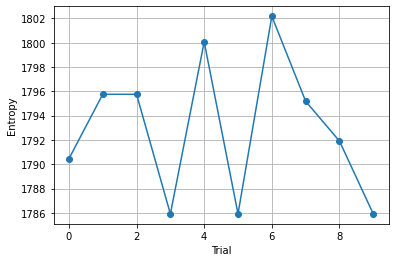

In [13]:
states = [minimize_blockmodel_dl(g) for _ in range(10)]
entropies = [state.entropy() for state in states]
# minimize_blockmodel_dl(g)  returns BlockState object
plt.plot(range(10), entropies, '-o')
plt.xlabel("Trial"), plt.ylabel("Entropy"), plt.grid()
state = states[np.argmin(entropies)]

In [14]:
b = state.get_blocks()
r = b[10]   # group membership of vertex 10
print(r)

3


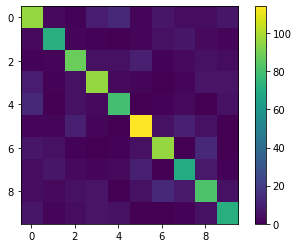

In [15]:
e = state.get_matrix()
im = plt.imshow(e.todense())
plt.colorbar(im);

Modularity of found partition: 0.6044
GN modularity of found partition (from prev lesson): 0.5996
GN modularity of original partition: 0.5744


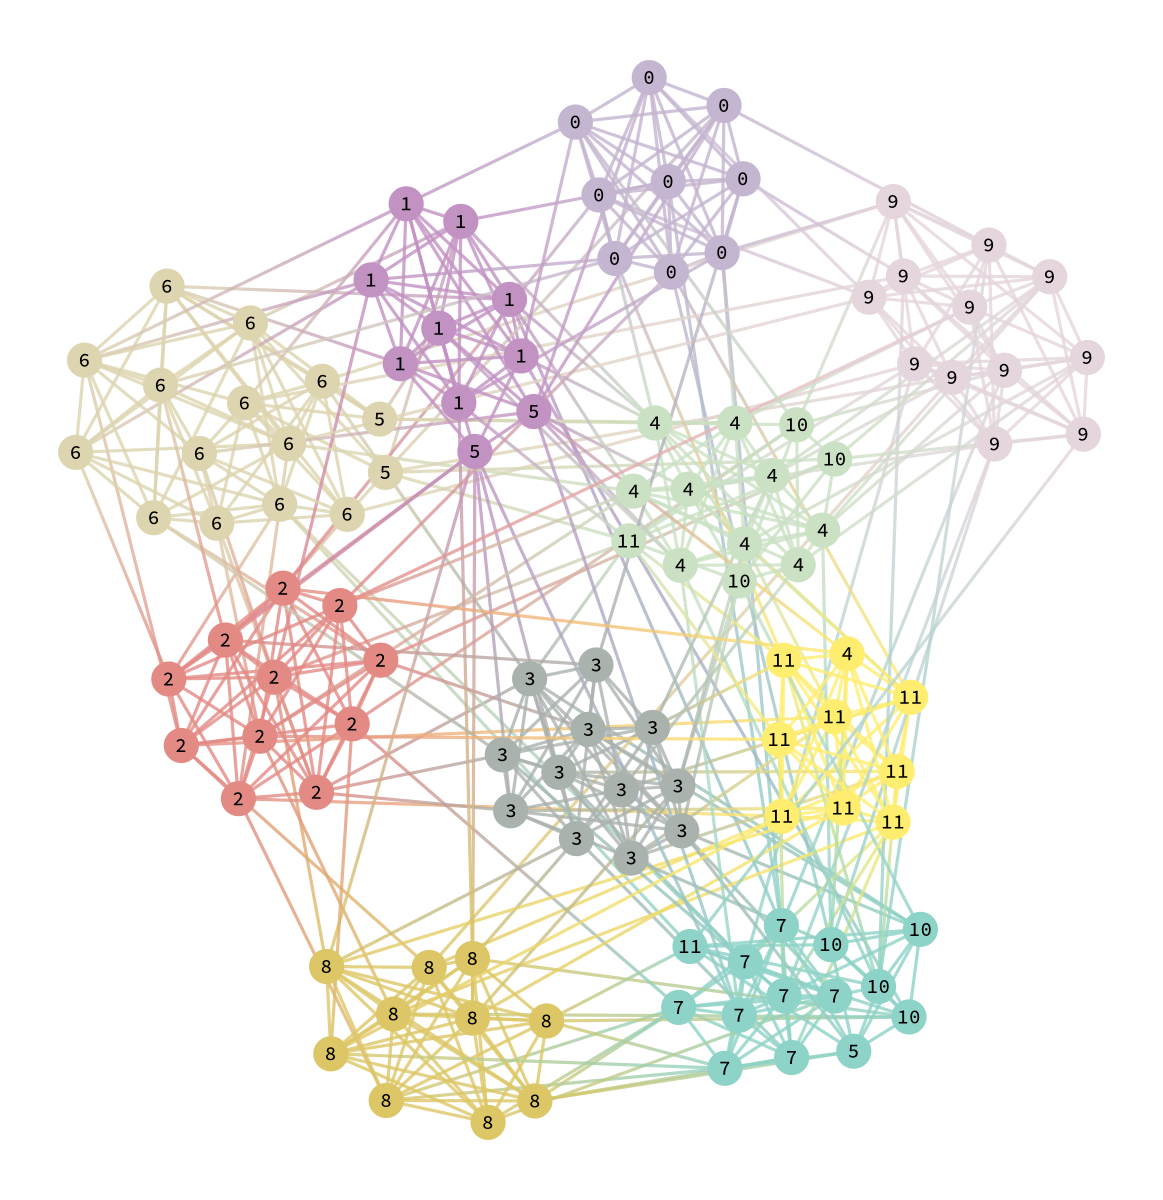

In [16]:
print(f"Modularity of found partition: {modularity(g, b):.4f}")
print(f"GN modularity of found partition (from prev lesson): {0.5996290274077901:.4f}")
print(f"GN modularity of original partition: {modularity(g, g.vp.value_tsevans):.4f}" )
state.draw(pos=g.vp.pos,vertex_text= g.vp['value']);

### <center> Nested model </center>

In [39]:
g = collection.data["celegansneural"]
print(g)

for k in g.graph_properties.keys():
    print(k+":",  g.gp[k])

<Graph object, directed, with 297 vertices and 2359 edges, 2 internal vertex properties, 1 internal edge property, 2 internal graph properties, at 0x7f7135db30d0>
description: Neural network: A directed, weighted network representing the neural network of C. Elegans. Data compiled by D. Watts and S. Strogatz and made available on the web `here <http://cdg.columbia.edu/cdg/datasets>`_. Please cite D. J. Watts and S. H. Strogatz, Nature 393, 440-442 (1998). Original experimental data taken from J. G. White, E. Southgate, J. N. Thompson, and S. Brenner, Phil. Trans. R. Soc. London 314, 1-340 (1986). Retrieved from `Mark Newman's website <http://www-personal.umich.edu/~mejn/netdata/>`_.
readme: Neural network of the nematode C. Elegans

Compiled by Duncan Watts and Steven Strogatz from original experimental
data by White et al.

The file celegansneural.gml describes a weighted, directed network
representing the neural network of C. Elegans.  The data were taken from
the web site of Prof. D

AttributeError: 'float' object has no attribute 'copy'

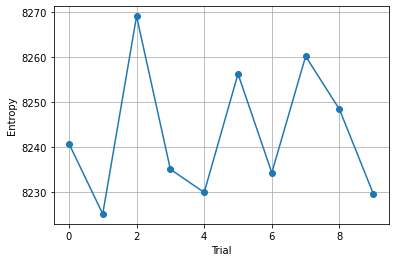

In [44]:
states = [minimize_nested_blockmodel_dl(g) for _ in range(10)]
entropies = [state.entropy() for state in states]
# minimize_blockmodel_dl(g)  returns BlockState object
plt.plot(range(10), entropies, '-o')
plt.xlabel("Trial"), plt.ylabel("Entropy"), plt.grid()
state = states[np.argmin(entropies)]
cel_ent = state.entropy().copy()

l: 0, N: 297, B: 15
l: 1, N: 15, B: 6
l: 2, N: 6, B: 2
l: 3, N: 2, B: 1


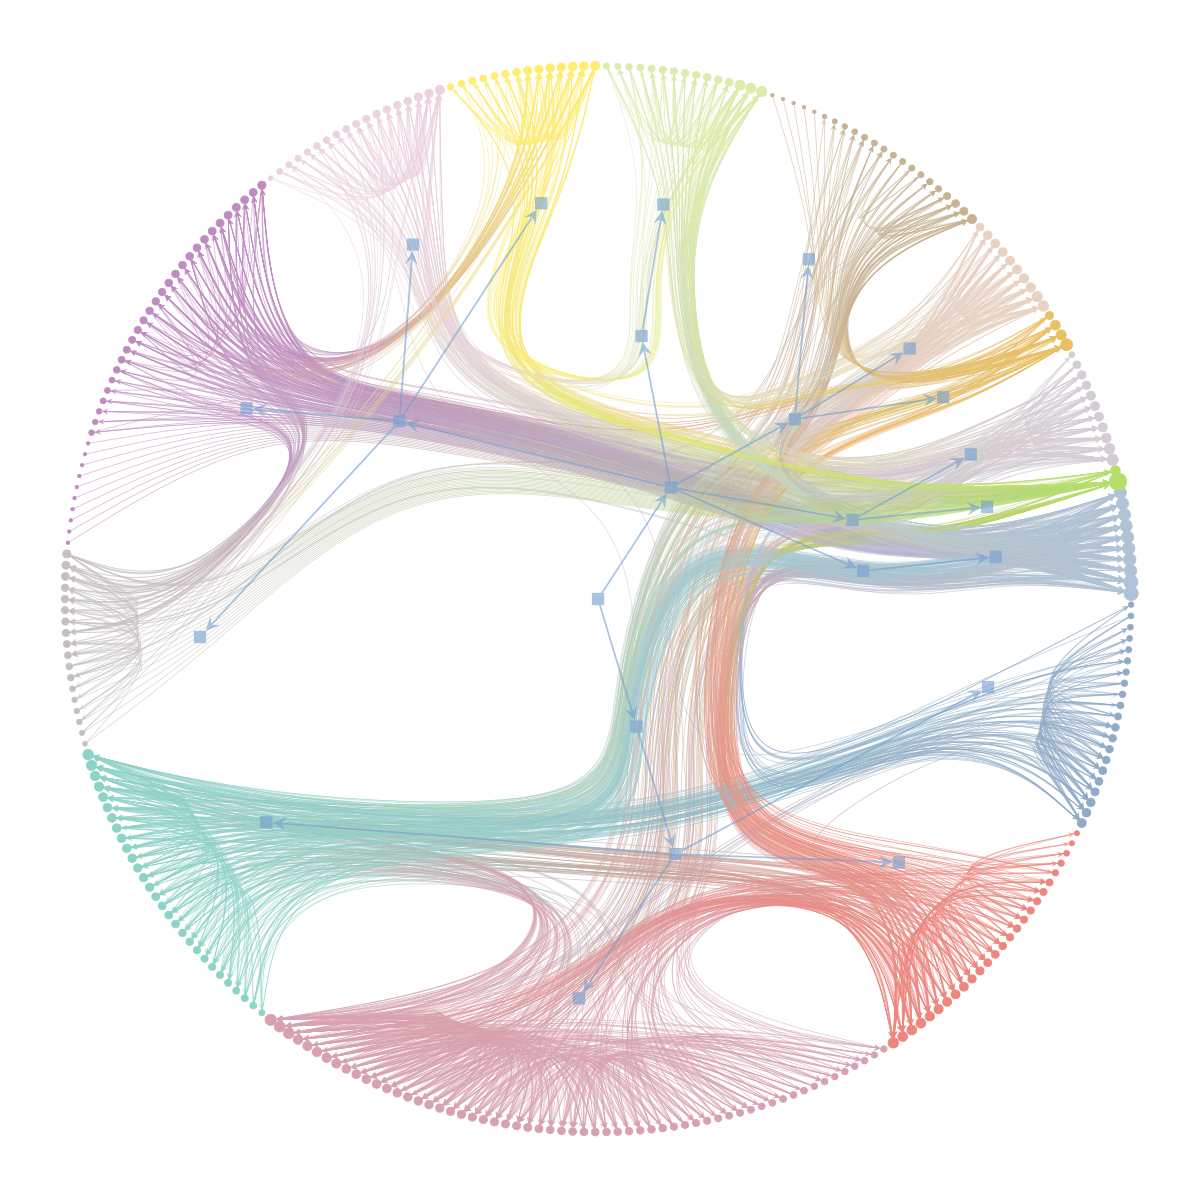

In [19]:
state.print_summary()
state.draw();

# <center> Trade-off between memory usage and computation time [8]</center>

In [59]:
g = collection.data["celegansneural"]

state = NestedBlockState(g)
state.print_summary()
state.entropy()

l: 0, N: 297, B: 1
l: 1, N: 1, B: 1
l: 2, N: 1, B: 1
l: 3, N: 1, B: 1
l: 4, N: 1, B: 1
l: 5, N: 1, B: 1
l: 6, N: 1, B: 1
l: 7, N: 1, B: 1
l: 8, N: 1, B: 1
l: 9, N: 1, B: 1


9468.527791619807

l: 0, N: 297, B: 11
l: 1, N: 11, B: 4
l: 2, N: 4, B: 1
l: 3, N: 1, B: 1
l: 4, N: 1, B: 1
l: 5, N: 1, B: 1
l: 6, N: 1, B: 1
l: 7, N: 1, B: 1
l: 8, N: 1, B: 1
l: 9, N: 1, B: 1


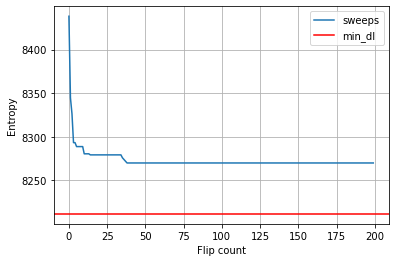

In [60]:
entropies = []
for _ in range(200): # this should be sufficiently large
    state.multiflip_mcmc_sweep(beta=np.inf, niter=10)
    entropies.append(state.entropy())
state.print_summary()
plt.plot(range(200), entropies, label = "sweeps")
plt.axhline(cel_ent,color = "red", label = 'min_dl', )
plt.xlabel("Flip count"), plt.ylabel("Entropy"), plt.grid(), plt.legend();

#### <center> Simulated annealing </center>

In [61]:
state = NestedBlockState(g)
mcmc_anneal(state, beta_range=(1, 10), niter=500, mcmc_equilibrate_args=dict(force_niter=10))
state.print_summary()
print(f"Entropy: {state.entropy()}, with MDL: {cel_ent}")

l: 0, N: 297, B: 21
l: 1, N: 21, B: 7
l: 2, N: 7, B: 2
l: 3, N: 2, B: 1
l: 4, N: 1, B: 1
l: 5, N: 1, B: 1
l: 6, N: 1, B: 1
l: 7, N: 1, B: 1
l: 8, N: 1, B: 1
l: 9, N: 1, B: 1
Entropy: 8150.537898604023, with MDL: 8211.603988675375


Combinations like <code>minimize_nested_blockmodel_dl</code> $\rightarrow$ <code>mcmc_anneal</code> could give better results.

#### <center> Model selection </center>

In [23]:
g = collection.data["celegansneural"]

state_ndc = minimize_nested_blockmodel_dl(g, deg_corr=False)
state_dc  = minimize_nested_blockmodel_dl(g, deg_corr=True)

print("Non-degree-corrected DL:\t", state_ndc.entropy())
print("Degree-corrected DL:\t\t", state_dc.entropy())

Non-degree-corrected DL:	 8529.502159049163
Degree-corrected DL:		 8216.06947699617


In [24]:
g = collection.data["football"]

state_ndc = minimize_nested_blockmodel_dl(g, deg_corr=False)
state_dc  = minimize_nested_blockmodel_dl(g, deg_corr=True)

print("Non-degree-corrected DL:\t", state_ndc.entropy())
print("Degree-corrected DL:\t\t", state_dc.entropy())

Non-degree-corrected DL:	 1733.5256851451725
Degree-corrected DL:		 1780.5767169430787


# <center> Sampling from the posterior distribution </center>

- More than one fit with similar post. prob.
- Attempting to move nodes into different groups
- Suitable for large networks (linear on # edges, indep of groups)

In [26]:
g = collection.data["lesmis"]

state = BlockState(g, B=1)   # This automatically initializes the state with a partition
                                # into one group. The user could also pass a higher number
                                # to start with a random partition of a given size, or pass a
                                # specific initial partition using the 'b' parameter.

# Now we run 1,000 sweeps of the MCMC. Note that the number of groups
# is allowed to change, so it will eventually move from the initial
# value of B=1 to whatever is most appropriate for the data.
print(f"Initial dl: {state.entropy()}")
dS, nattempts, nmoves = state.multiflip_mcmc_sweep(niter=10000)

print("Change in description length:", dS)
print("Number of vertex moves attempts:", nattempts)
print("Number of accepted vertex moves:", nmoves)
print(f"Final dl: {state.entropy()}")

Initial dl: 787.4999819793873
Change in description length: -71.4314895705073
Number of vertex moves attempts: 3571289
Number of accepted vertex moves: 449625
Final dl: 716.0684924088499


In [27]:
# We will accept equilibration if 10 sweeps are completed without a
# record breaking event, 2 consecutive times.
state = BlockState(g, B=1)
mcmc_equilibrate(state, wait=1000, nbreaks=2, mcmc_args=dict(niter=10))

(698.9506193551209, 9157858, 1117729)

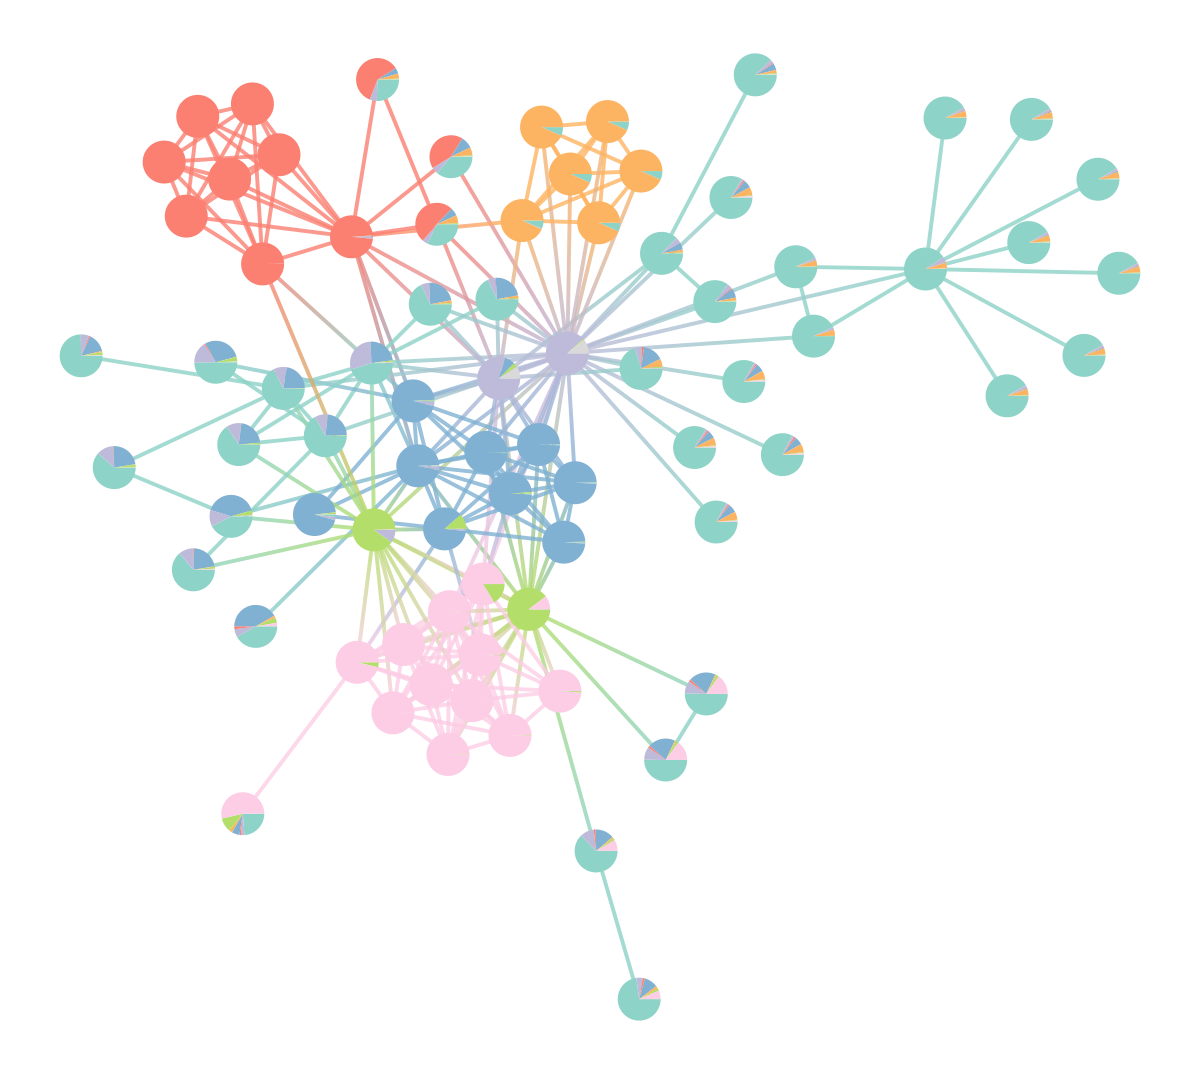

<VertexPropertyMap object with value type 'vector<double>', for Graph 0x7f7136fe3340, at 0x7f7135d54be0>

In [28]:
# We will first equilibrate the Markov chain
mcmc_equilibrate(state, wait=1000, mcmc_args=dict(niter=10))

bs = [] # collect some partitions

def collect_partitions(s):
   global bs
   bs.append(s.b.a.copy())

# Now we collect partitions for exactly 100,000 sweeps, at intervals
# of 10 sweeps:
mcmc_equilibrate(state, force_niter=10000, mcmc_args=dict(niter=10),
                    callback=collect_partitions)

# Disambiguate partitions and obtain marginals
pmode = PartitionModeState(bs, converge=True)
pv = pmode.get_marginal(g)

# Now the node marginals are stored in property map pv. We can
# visualize them as pie charts on the nodes:
state.draw(pos=g.vp.pos, vertex_shape="pie", vertex_pie_fractions=pv,)

# <center>Assortative community structure </center>
- Planted partition model [9]

0.6005165407471079


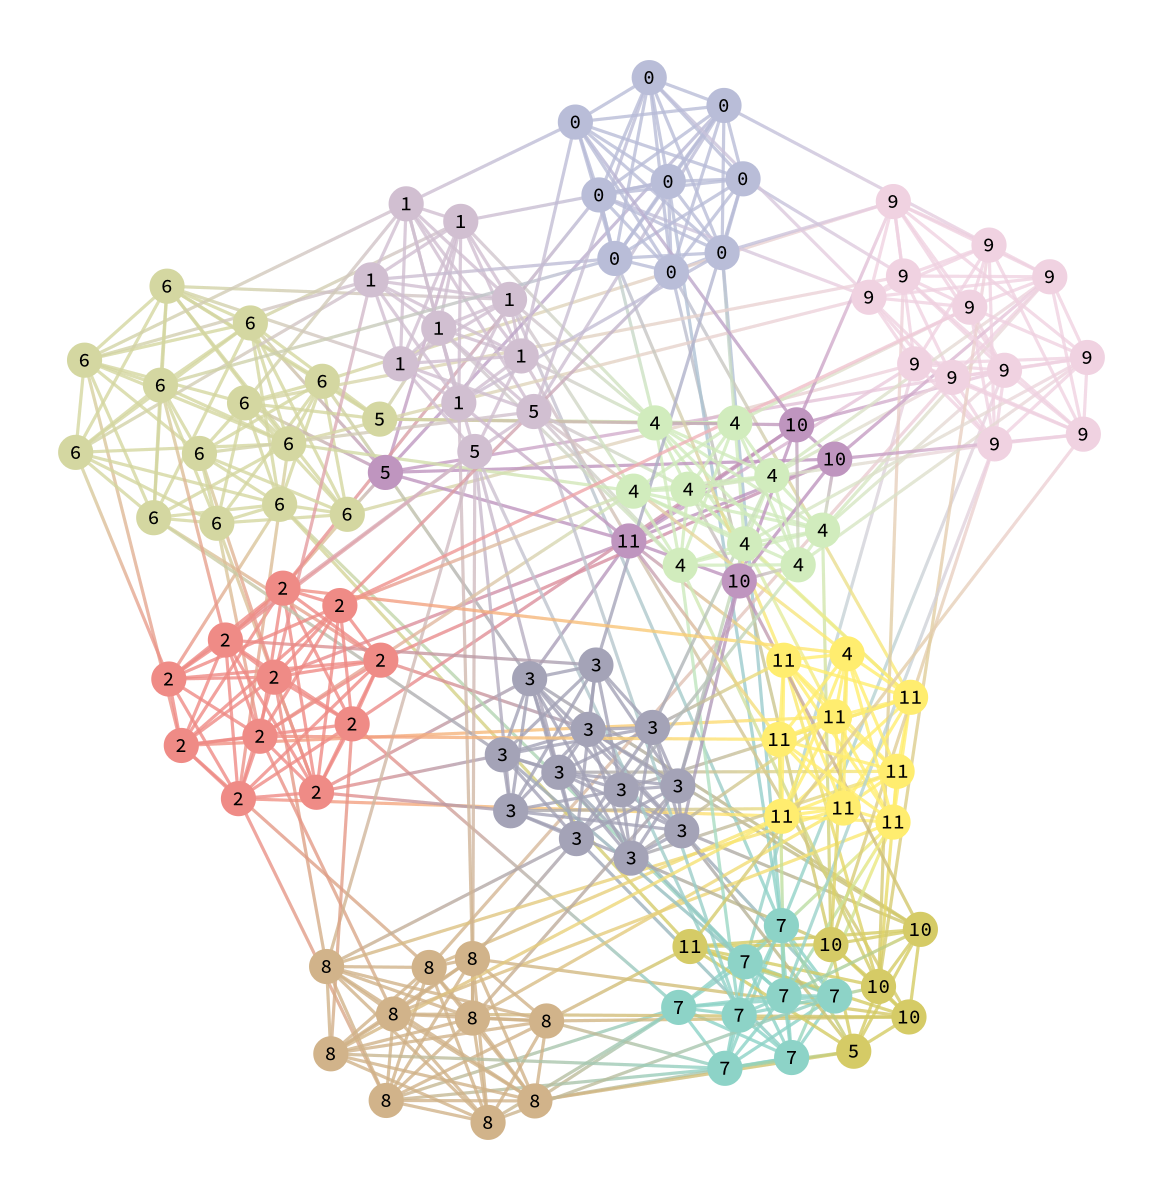

<VertexPropertyMap object with value type 'vector<double>', for Graph 0x7f7137009d90, at 0x7f7137009f10>

In [65]:
g = collection.data["football"]

state = PPBlockState(g)
# Now we run 1,000 sweeps of the MCMC with zero temperature.
state.multiflip_mcmc_sweep(beta=np.inf, niter=1000)
print(modularity(g, state.get_blocks()))
state.draw(pos=g.vp.pos,vertex_text= g.vp['value'])

# <center>Network reconstruction  </center>

- Generative models can make predictions [10]
- Repair or replace edges
- $\boldsymbol{\mathcal{D}} $ observed data

$$
P(\boldsymbol A, \boldsymbol b | \boldsymbol{\mathcal{D}}) =
\frac{P(\boldsymbol{\mathcal{D}} | \boldsymbol A)P(\boldsymbol A, \boldsymbol b)}{P(\boldsymbol{\mathcal{D}})}
$$

- Marginal probability of edge $\{i,j\}$

$$
\pi_{ij} = \sum_{\boldsymbol A, \boldsymbol b}A_{ij}P(\boldsymbol A, \boldsymbol b | \boldsymbol{\mathcal{D}}).
$$

- Best estimate

$$
\begin{split}\hat A_{ij} =
    \begin{cases}
        1 & \text{ if } \pi_{ij} > \frac{1}{2},\\
        0 & \text{ if } \pi_{ij} < \frac{1}{2}.\\
    \end{cases}\end{split}
    $$

- <code>MeasuredBlockState</code> $\rightarrow$ <code>MixedMeasuredBlockState</code> $\rightarrow$ <code>UncertainBlockState</code> 

### <center> Measured networks </center>
- $\boldsymbol n$: number of measurements
- $\boldsymbol x$: number of observations
- $p$: probability of missing edge occurrence
- $q$: probability of spurious edge occurrence


$$
P(\boldsymbol x | \boldsymbol n, \boldsymbol A, \boldsymbol p, \boldsymbol q) =
\prod_{i<j}{n_{ij}\choose x_{ij}}\left[(1-p_{ij})^{x_{ij}}p_{ij}^{n_{ij}-x_{ij}}\right]^{A_{ij}}
\left[q_{ij}^{x_{ij}}(1-q_{ij})^{n_{ij}-x_{ij}}\right]^{1-A_{ij}}.$$

- $p$ and $q$ are generally not known $\rightarrow$ integrated likelihood

$$
P(\boldsymbol x | \boldsymbol n, \boldsymbol A, \alpha,\beta,\mu,\nu) =
\int P(\boldsymbol x | \boldsymbol n, \boldsymbol A, p, q) P(p|\alpha,\beta) P(q|\mu,\nu)\;\mathrm{d}p\,\mathrm{d}q
$$

In [30]:
g = collection.data["lesmis"].copy()

# pretend we have measured and observed each edge twice

n = g.new_ep("int", 2)   # number of measurements
x = g.new_ep("int", 2)   # number of observations

e = g.edge(11, 36)
x[e] = 1                 # pretend we have observed edge (11, 36) only once

e = g.add_edge(15, 73)
n[e] = 2                 # pretend we have measured non-edge (15, 73) twice,
x[e] = 1                 # but observed it as an edge once.

In [31]:
# We inititialize MeasuredBlockState, assuming that each non-edge has
# been measured only once (as opposed to twice for the observed
# edges), as specified by the 'n_default' and 'x_default' parameters.

state = MeasuredBlockState(g, n=n, n_default=1, x=x, x_default=0)

# We will first equilibrate the Markov chain
mcmc_equilibrate(state, wait=1000, mcmc_args=dict(niter=10))

(1035.6463478081441, 10881739, 2640325)

In [32]:
# Now we collect the marginals for exactly 100,000 sweeps, at
# intervals of 10 sweeps:

u = None              # marginal posterior edge probabilities
bs = []               # partitions
cs = []               # average local clustering coefficient

def collect_marginals(s):
   global u, bs, cs
   u = s.collect_marginal(u)
   bstate = s.get_block_state()
   bs.append(bstate.levels[0].b.a.copy())
   cs.append(local_clustering(s.get_graph()).fa.mean())

In [33]:
mcmc_equilibrate(state, force_niter=10000, mcmc_args=dict(niter=10),
                    callback=collect_marginals)

eprob = u.ep.eprob
print("Posterior probability of edge (11, 36):", eprob[u.edge(11, 36)])
print("Posterior probability of non-edge (15, 73):", eprob[u.edge(15, 73)])
print("Estimated average local clustering: %g ± %g" % (np.mean(cs), np.std(cs)))

Posterior probability of edge (11, 36): 0.7044704470447045
Posterior probability of non-edge (15, 73): 0.0349034903490349
Estimated average local clustering: 0.57169 ± 0.00336791


### <center> Maximum marginal posterior estimate </center>

In [34]:
# The maximum marginal posterior estimator can be obtained by
# filtering the edges with probability larger than .5

u = GraphView(u, efilt=u.ep.eprob.fa > .5)

# Mark the recovered true edges as red, and the removed spurious edges as green
ecolor = u.new_ep("vector<double>", val=[0, 0, 0, .6])
for e in u.edges():
    if g.edge(e.source(), e.target()) is None or (e.source(), e.target()) == (11, 36):
        ecolor[e] = [1, 0, 0, .6]
for e in g.edges():
    if u.edge(e.source(), e.target()) is None:
        ne = u.add_edge(e.source(), e.target())
        ecolor[ne] = [0, 1, 0, .6]

In [35]:
# Duplicate the internal block state with the reconstructed network
# u, for visualization purposes.

bstate = state.get_block_state()
bstate = bstate.levels[0].copy(g=u)

# Disambiguate partitions and obtain marginals
pmode = PartitionModeState(bs, converge=True)
pv = pmode.get_marginal(u)

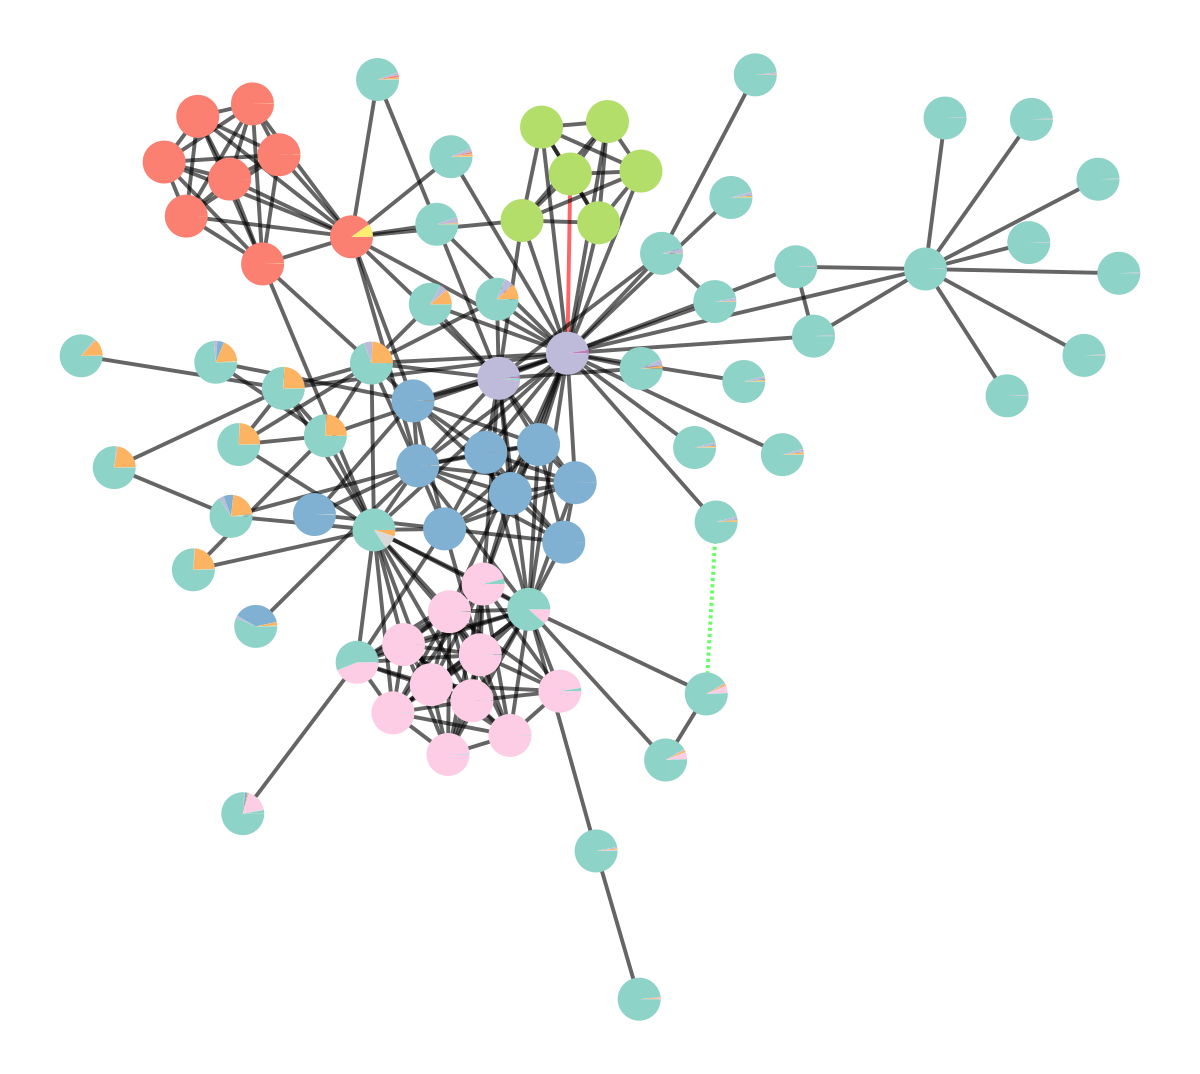

<VertexPropertyMap object with value type 'vector<double>', for Graph 0x7f712ff315e0, at 0x7f7135b29910>

In [36]:
edash = u.new_ep("vector<double>")
edash[u.edge(15, 73)] = [.1, .1, 0]
bstate.draw(pos=u.own_property(g.vp.pos), vertex_shape="pie", vertex_pie_fractions=pv,
            edge_color=ecolor, edge_dash_style=edash, edge_gradient=None,)

# <center> Edge prediction as binary classification </center>
- Fit generative model and compute edge/non-edge scores ($\boldsymbol A$ and $\delta \boldsymbol A$, respectively)
- Get probabilities of edges
$$
P(\delta \boldsymbol A | \boldsymbol A) \propto
\sum_{\boldsymbol b}\frac{P(\boldsymbol A \cup \delta\boldsymbol A| \boldsymbol b)}{P(\boldsymbol A| \boldsymbol b)}P(\boldsymbol b | \boldsymbol A)
$$
-$P(\delta \boldsymbol A | \boldsymbol A, \boldsymbol b)$ can be obtained by <code>get_edges_prob</code>

<img alt="../../_images/football_missing.svg" src="https://graph-tool.skewed.de/static/doc/_images/football_missing.svg" width="350px">
<span class="caption-text">Two non-existing edges in the football network (in red):
<span class="math notranslate nohighlight"><mjx-container class="MathJax CtxtMenu_Attached_0" jax="CHTML" style="font-size: 119.8%; position: relative;" role="presentation" tabindex="0" ctxtmenu_counter="188"><mjx-math class="MJX-TEX" aria-hidden="true"><mjx-mo class="mjx-n"><mjx-c class="mjx-c28"></mjx-c></mjx-mo><mjx-mn class="mjx-n"><mjx-c class="mjx-c31"></mjx-c><mjx-c class="mjx-c30"></mjx-c><mjx-c class="mjx-c31"></mjx-c></mjx-mn><mjx-mo class="mjx-n"><mjx-c class="mjx-c2C"></mjx-c></mjx-mo><mjx-mn class="mjx-n" space="2"><mjx-c class="mjx-c31"></mjx-c><mjx-c class="mjx-c30"></mjx-c><mjx-c class="mjx-c32"></mjx-c></mjx-mn><mjx-mo class="mjx-n"><mjx-c class="mjx-c29"></mjx-c></mjx-mo></mjx-math><mjx-assistive-mml role="presentation" unselectable="on" display="inline"><math xmlns="http://www.w3.org/1998/Math/MathML"><mo stretchy="false">(</mo><mn>101</mn><mo>,</mo><mn>102</mn><mo stretchy="false">)</mo></math></mjx-assistive-mml></mjx-container></span> in the middle, and <span class="math notranslate nohighlight"><mjx-container class="MathJax CtxtMenu_Attached_0" jax="CHTML" style="font-size: 119.8%; position: relative;" role="presentation" tabindex="0" ctxtmenu_counter="189"><mjx-math class="MJX-TEX" aria-hidden="true"><mjx-mo class="mjx-n"><mjx-c class="mjx-c28"></mjx-c></mjx-mo><mjx-mn class="mjx-n"><mjx-c class="mjx-c31"></mjx-c><mjx-c class="mjx-c37"></mjx-c></mjx-mn><mjx-mo class="mjx-n"><mjx-c class="mjx-c2C"></mjx-c></mjx-mo><mjx-mn class="mjx-n" space="2"><mjx-c class="mjx-c35"></mjx-c><mjx-c class="mjx-c36"></mjx-c></mjx-mn><mjx-mo class="mjx-n"><mjx-c class="mjx-c29"></mjx-c></mjx-mo></mjx-math><mjx-assistive-mml role="presentation" unselectable="on" display="inline"><math xmlns="http://www.w3.org/1998/Math/MathML"><mo stretchy="false">(</mo><mn>17</mn><mo>,</mo><mn>56</mn><mo stretchy="false">)</mo></math></mjx-assistive-mml></mjx-container></span> in the upper
right region of the figure. </span>

In [37]:
g = collection.data["football"]

missing_edges = [(101, 102), (17, 56)]

L = 10

state = minimize_nested_blockmodel_dl(g, deg_corr=True)

bs = state.get_bs()                     # Get hierarchical partition.
bs += [np.zeros(1)] * (L - len(bs))     # Augment it to L = 10 with
                                        # single-group levels.

state = state.copy(bs=bs, sampling=True)

probs = ([], [])

def collect_edge_probs(s):
    p1 = s.get_edges_prob([missing_edges[0]], entropy_args=dict(partition_dl=False))
    p2 = s.get_edges_prob([missing_edges[1]], entropy_args=dict(partition_dl=False))
    probs[0].append(p1)
    probs[1].append(p2)

# Now we collect the probabilities for exactly 100,000 sweeps
mcmc_equilibrate(state, force_niter=10000, mcmc_args=dict(niter=10),
                    callback=collect_edge_probs)


def get_avg(p):
   p = np.array(p)
   pmax = p.max()
   p -= pmax
   return pmax + np.log(np.exp(p).mean())

p1 = get_avg(probs[0])
p2 = get_avg(probs[1])

p_sum = get_avg([p1, p2]) + np.log(2)

l1 = p1 - p_sum
l2 = p2 - p_sum

print("likelihood-ratio for %s: %g" % (missing_edges[0], np.exp(l1)))
print("likelihood-ratio for %s: %g" % (missing_edges[1], np.exp(l2)))

likelihood-ratio for (101, 102): 0.365437
likelihood-ratio for (17, 56): 0.634563


# <center> Summary </center>

- Graph-tool is C++ based, Python-wrapped
- (n)SBM calculations
- Inference of best partition
- Sampling from posterior distribution
- Network reconstruction

Ad:

- Hannu Reittu, Ilkka Norros, Tomi Räty, Marianna Bolla and Fülöp Bazsó : Regular decomposition of large graphs: foundation of a sampling approach to stochastic block model fitting. Data Science and Engineering 4 (1): pp. 44-60, 2019. https://doi.org/10.1007/s41019-019-0084-x

- Hannu Reittu, Fülöp Bazsó and Robert Weiss Regular Decomposition of Multivariate Time Series and Other Matrices, Structural, Syntactic, and Statistical Pattern Recognition, Lecture Notes in Computer Science , Volume 8621, 2014, pp 424-433 



<center><span style="white-space:nowrap;"><img src="https://graph-tool.skewed.de/static/img/graph-tool-logo.svg" alt="logo" style="width:50px"><strong>graph-tool</strong></span></center>

### <center> <strong> Thank you for your attention! </strong> </center>

Sources:
<ul style="font-size:10px">
<li> [1]: Tiago P. Peixoto, “Bayesian stochastic blockmodeling”, Advances in Network Clustering and Blockmodeling, edited by P. Doreian, V. Batagelj, A. Ferligoj, (Wiley, New York, 2019) DOI: 10.1002/9781119483298.ch11 </li>
<li> [2]: Paul W. Holland, Kathryn Blackmond Laskey, Samuel Leinhardt, “Stochastic blockmodels: First steps”, Social Networks Volume 5, Issue 2, Pages 109-137 (1983). DOI: 10.1016/0378-8733(83)90021-7 </li>
<li> [3]: Tiago P. Peixoto, “Nonparametric Bayesian inference of the microcanonical stochastic block model”, Phys. Rev. E 95 012317 (2017). DOI: 10.1103/PhysRevE.95.012317</li>
<li> [4]: Brian Karrer, M. E. J. Newman “Stochastic blockmodels and community structure in networks”, Phys. Rev. E 83, 016107 (2011). DOI: 10.1103/PhysRevE.83.016107</li>
<li> [5]: Tiago P. Peixoto, “Parsimonious module inference in large networks”, Phys. Rev. Lett. 110, 148701 (2013). DOI: 10.1103/PhysRevLett.110.148701</li>
<li> [6]: Tiago P. Peixoto, “Hierarchical block structures and high-resolution model selection in large networks”, Phys. Rev. X 4, 011047 (2014). DOI: 10.1103/PhysRevX.4.011047</li>
<li> [7]: Tiago P. Peixoto, “Efficient Monte Carlo and greedy heuristic for the inference of stochastic block models”, Phys. Rev. E 89, 012804 (2014).</li>
<li> [8]: Tiago P. Peixoto, “Merge-split Markov chain Monte Carlo for community detection”, Phys. Rev. E 102, 012305 (2020), DOI: 10.1103/PhysRevE.102.012305</li>
<li> [9]: Lizhi Zhang, Tiago P. Peixoto, “Statistical inference of assortative community structures”, arXiv: 2006.14493</li>
<li> [10]: Tiago P. Peixoto, “Reconstructing networks with unknown and heterogeneous errors”, Phys. Rev. X 8 041011 (2018). DOI: 10.1103/PhysRevX.8.041011</li>
<li> [11]: Aaron Clauset, Cristopher Moore, M. E. J. Newman, “Hierarchical structure and the prediction of missing links in networks”, Nature 453, 98-101 (2008). DOI: 10.1038/nature06830</li>
<li> [12]: Roger Guimerà, Marta Sales-Pardo, “Missing and spurious interactions and the reconstruction of complex networks”, PNAS vol. 106 no. 52 (2009). DOI: 10.1073/pnas.0908366106</li>
</ul>
    
#### <center> Kristóf Furuglyás  </center>

##### <center> This presentation is partly based on graph-tool's [cookbook](https://graph-tool.skewed.de/static/doc/demos/index.html). <center>
    
#### <center> Clustering with networks, 2020 </center>